## Série Temporal

In [11]:
#Bibliotecas nescessarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

mos utilizar dados do numero de turismo para o brasil desde de 1989. Dados adaptados de [link](http://dados.gov.br/dataset/chegada-turistas)

In [12]:
dados = pd.read_csv('chegadasBrasil.csv')
dados.head()

,data,Chegadas
0,1989-01-01,291566.0
1,1989-02-01,197348.0
2,1989-03-01,149001.0
3,1989-04-01,84867.0
4,1989-05-01,69293.0


In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
data        348 non-null object
Chegadas    348 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB


**Transformando 'Data' no formato datetime**

A duas maneiras de fazer isto uma com a função *pd.to_datetime()* outra com aplicando funções, esta maneira apesar de mais complexa tem uma resposta mais rapida.

In [14]:
#Transformando data com a to_datetime
dados['Data1'] = pd.to_datetime(dados['data'])

In [15]:
#Transformando data com apply
def trasnfData(data):
    return datetime.strptime(data,'%Y-%m-%d')
dados['Data2'] = dados['data'].apply(trasnfData)

### Serie Temporais no pandas

Para trabalharmo com series temporais em pandas precisamos que uma coluna no formato datetime seja o index da tabela

In [16]:
dados.index = dados['Data2']

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 348 entries, 1989-01-01 to 2017-12-01
Data columns (total 4 columns):
data        348 non-null object
Chegadas    348 non-null float64
Data1       348 non-null datetime64[ns]
Data2       348 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 13.6+ KB


Agora podemos demontrar qualquer valor numerico como uma serie temporal

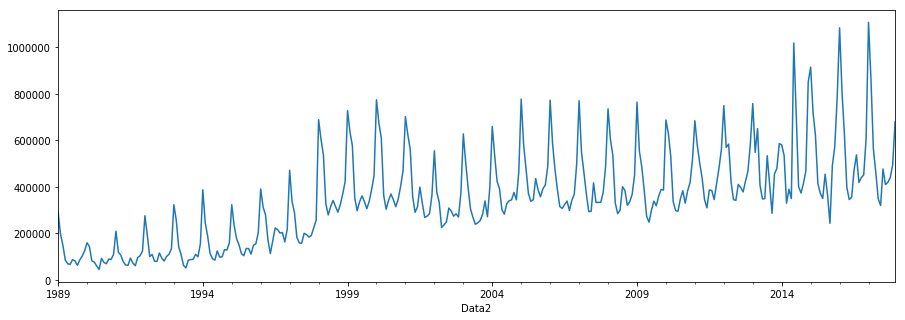

In [18]:
dados['Chegadas'].plot(figsize=(15,5))

Podemos perceber a sazonalidade que temos no turismo brasileiro, aonde temos picos no verão e quedas no inverno, porém em 2014 temos o pico no inverno, devido a copa no brasil 

### API

Series temporais são muito utilizadas para análise de preços de Ações, para isto precisamos sempre de dados atualizados.
Antes de aprendermos a fazer as analises nas series vamos aprender como pegar os dados atualizados usando APIS.

Para istos vamos utilizar a alphavantage, como um exemplo de API JSON online, é a biblioteca pandas-datareader como exemplo de utilização de uma api atraves de uma biblioteca

**alphavantage**

In [13]:
import requests
import json

In [14]:
symblo = 'MSFT'
apikey = 'demo'
link = 'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY&symbol='+symblo+'&apikey='+apikey

In [15]:
texto = requests.get(link).text
dicionario = json.loads(texto)['Monthly Time Series']

In [16]:
tabela = pd.DataFrame(dicionario).transpose()
tabela.head()

,1. open,2. high,3. low,4. close,5. volume
2018-11-29,107.0500,112.2400,99.3528,110.1900,686215891
2018-10-31,114.7500,116.1800,100.1100,106.8100,927547942
2018-09-28,110.8500,115.2900,107.2300,114.3700,480255674
2018-08-31,106.0300,112.7770,104.8400,112.3300,456630721
2018-07-31,98.1000,111.1500,98.0000,106.0800,569501573


In [17]:
tabela.tail()

,1. open,2. high,3. low,4. close,5. volume
1998-06-30,83.8700,108.5600,83.1200,108.3700,308288100
1998-05-29,90.1900,91.0000,81.8700,84.8100,273845600
1998-04-30,89.8100,99.1200,86.6200,90.1200,254744300
1998-03-31,85.8700,90.9400,79.2500,89.5000,274981900
1998-02-27,151.7500,160.0600,79.3700,84.7500,215523150


In [18]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2018-11-29 to 1998-02-27
Data columns (total 5 columns):
1. open      250 non-null object
2. high      250 non-null object
3. low       250 non-null object
4. close     250 non-null object
5. volume    250 non-null object
dtypes: object(5)
memory usage: 11.7+ KB


**Transformando dados em serie Temporal**

Todos os dados estão como objeto, e nescessario converte-los para float

In [19]:
for coluna in tabela:
    tabela[coluna] = tabela[coluna].astype(float)

Porém para transforma-los em serie temporais é nescessario que o index seja datetime.

Há dois modos de fazer isso:

In [20]:
#Modo 1:Utilizando a função to_datetime
#OBS: Este modo é lendo, não sendo ideal para dados muito grandes
tabela2 = tabela.copy()
tabela2.index = pd.to_datetime(tabela2.index)

In [21]:
#Modo 2: Utilizando Apply para converter string em datetime
def converterData(data):
    return datetime.strptime(data,'%Y-%m-%d')

#Convertendo index para serie 
serieDatas = pd.Series(tabela.index)
#Aplicando o apply
tabela.index = serieDatas.apply(converterData)

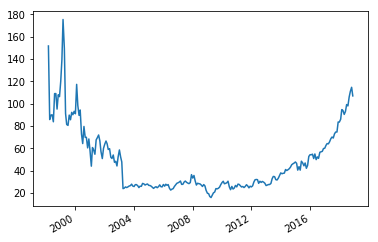

In [22]:
tabela['1. open'].plot();

**Pegando dados a partir de uma biblioteca**

**OBS: Instalar**

pip install pandas-datareader

pip install fix-yahoo-finance

In [6]:
import pandas_datareader as pdr
import datetime 
petro = pdr.get_data_yahoo('PBR', 
                          start=datetime.datetime(2000, 2, 29), 
                          end=datetime.datetime(2018, 2, 28))

In [7]:
petro.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-08-10,7.15625,6.12500,6.31250,7.15625,143929200.0,0.022470
2000-08-11,7.28125,6.75000,6.84375,7.14062,25139200.0,0.022421
2000-08-14,7.21875,7.00000,7.03125,7.10938,6935200.0,0.022323
2000-08-15,7.35938,7.01562,7.10938,7.14062,9078800.0,0.022421
2000-08-16,7.50000,7.12500,7.20312,7.32812,11728000.0,0.023010


In [25]:
#Salvando dados
petro.to_csv('PBR.csv')

In [26]:
petro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2000-08-10 to 2018-03-01
Data columns (total 6 columns):
High         4416 non-null float64
Low          4416 non-null float64
Open         4416 non-null float64
Close        4416 non-null float64
Volume       4416 non-null float64
Adj Close    4416 non-null float64
dtypes: float64(6)
memory usage: 241.5 KB


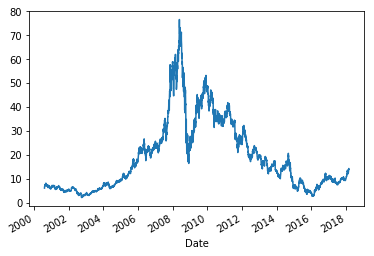

In [27]:
petro['Open'].plot();

### Manipulando series temporais

Agora com os dados em mão, de varias maneiras, vamos manipular a serie temporal com as funcionalidade fornecidas pelo pandas

**Aplicando filtros**

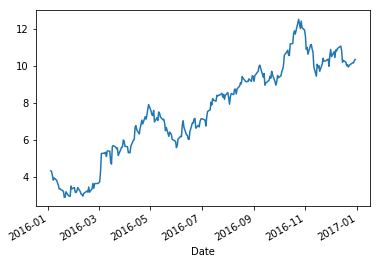

In [28]:
#Retirando apenas dados do ano 2016
petro['2016']['Open'].plot();

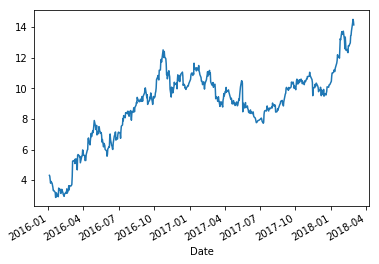

In [29]:
#Retirando a partir do ano 2016
petro['2016':]['Open'].plot();

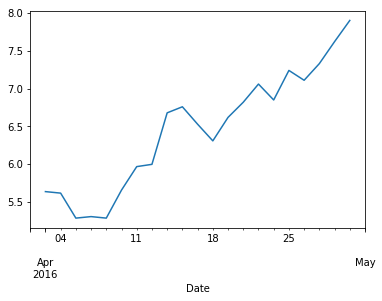

In [30]:
#Retirando apenas dados do mês 04 de 2016
petro['2016-04']['Open'].plot();

## Suavizando

Podemos suavizar uma serie tempora utilizando agrupando seus dados e aplicando a media. O pandas contêm metodos que permitem agrupar series temporais por periodos como dia, mes ou anos.M

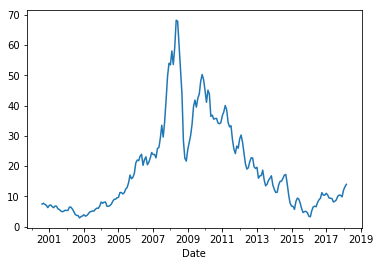

In [31]:
grupoMensal = petro.groupby(pd.Grouper(freq='M'))
mediaMensal = grupoMensal.mean()
mediaMensal['Close'].plot();

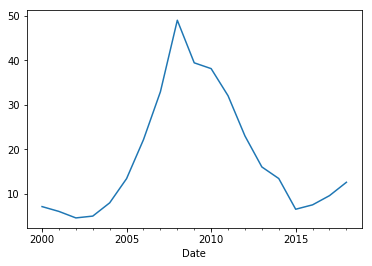

In [32]:
grupoAnual = petro.groupby(pd.Grouper(freq='Y'))
mediaAnual = grupoAnual.mean()
mediaAnual['Close'].plot();

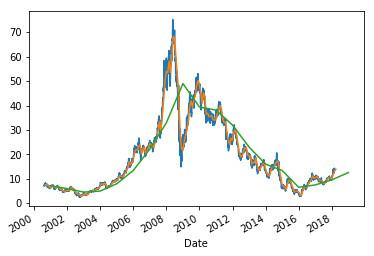

In [33]:
#Comparando com original
petro['Close'].plot()
mediaMensal['Close'].plot();
mediaAnual['Close'].plot();

**Obs:** Porem também podemos utilizar o groupby para fazer outras funcionalidades apenas alterando a função de agrupamento, podemo calcular o valor maximo de cada periodo ou a soma dos valores

**Operações em series**

Podemos fazer operações para encontrar novos valores como por exemplo a diferença dos valores diarios de uma Ação

In [34]:
petro['diff'] = petro['Open'] - petro['Close']
petro.head()

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2000-08-10,7.15625,6.12500,6.31250,7.15625,143929200.0,0.022516,-0.84375
2000-08-11,7.28125,6.75000,6.84375,7.14062,25139200.0,0.022467,-0.29687
2000-08-14,7.21875,7.00000,7.03125,7.10938,6935200.0,0.022369,-0.07813
2000-08-15,7.35938,7.01562,7.10938,7.14062,9078800.0,0.022467,-0.03124
2000-08-16,7.50000,7.12500,7.20312,7.32812,11728000.0,0.023057,-0.12500


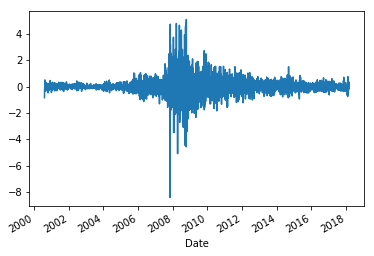

In [35]:
petro['diff'].plot();

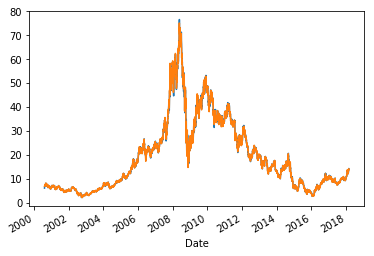

In [36]:
petro['Open'].plot();
petro['Close'].plot();

**Plotando serie com duas escalas diferentes**

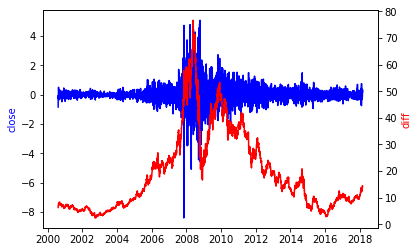

In [37]:
fig, ax1 = plt.subplots();
ax1.plot(petro['diff'],color='b');
ax1.set_ylabel('close',color='b');
ax2 = ax1.twinx();
ax2.plot(petro['Open'], color='r');
ax2.set_ylabel('diff', color='r');

### Variação diaria

Outro valor muito observado em uma serie temporal é a variação diaria, ou seja, o quando um valor alterou de um dia para outro.
Este calculo está exemplicado com valores diarios porém pode ser calculado com qualquer intervalo de tempo.

In [38]:
petro['Close'][:10]

Date
2000-08-10    7.15625
2000-08-11    7.14062
2000-08-14    7.10938
2000-08-15    7.14062
2000-08-16    7.32812
2000-08-17    7.68750
2000-08-18    7.25000
2000-08-21    7.28125
2000-08-22    7.35938
2000-08-23    7.53125
Name: Close, dtype: float64

In [39]:
#Shift
shiftTabela = petro['Close'].shift(1)
shiftTabela[:10]

Date
2000-08-10        NaN
2000-08-11    7.15625
2000-08-14    7.14062
2000-08-15    7.10938
2000-08-16    7.14062
2000-08-17    7.32812
2000-08-18    7.68750
2000-08-21    7.25000
2000-08-22    7.28125
2000-08-23    7.35938
Name: Close, dtype: float64

In [40]:
#Variação com shift
shiftClose = petro['Close'] - shiftTabela
shiftClose[:10]

Date
2000-08-10        NaN
2000-08-11   -0.01563
2000-08-14   -0.03124
2000-08-15    0.03124
2000-08-16    0.18750
2000-08-17    0.35938
2000-08-18   -0.43750
2000-08-21    0.03125
2000-08-22    0.07813
2000-08-23    0.17187
Name: Close, dtype: float64

**Variação Percentual**

O pandas oference uma função apra calcular a variação percentual, ele é um calculo similar a variação diaria, porém em percentual

In [41]:
#O parametro passado é o intervalo de tempo, nesse caso 1 dia
pct_change = petro['Close'].pct_change(1)
pct_change[:10]

Date
2000-08-10         NaN
2000-08-11   -0.002184
2000-08-14   -0.004375
2000-08-15    0.004394
2000-08-16    0.026258
2000-08-17    0.049041
2000-08-18   -0.056911
2000-08-21    0.004310
2000-08-22    0.010730
2000-08-23    0.023354
Name: Close, dtype: float64

In [42]:
## Adicionando variação Percentual a tabela
petro['pct_change'] = pct_change
petro.head()

,High,Low,Open,Close,Volume,Adj Close,diff,pct_change
Date,,,,,,,,
2000-08-10,7.15625,6.12500,6.31250,7.15625,143929200.0,0.022516,-0.84375,NaN
2000-08-11,7.28125,6.75000,6.84375,7.14062,25139200.0,0.022467,-0.29687,-0.002184
2000-08-14,7.21875,7.00000,7.03125,7.10938,6935200.0,0.022369,-0.07813,-0.004375
2000-08-15,7.35938,7.01562,7.10938,7.14062,9078800.0,0.022467,-0.03124,0.004394
2000-08-16,7.50000,7.12500,7.20312,7.32812,11728000.0,0.023057,-0.12500,0.026258


**Histograma**

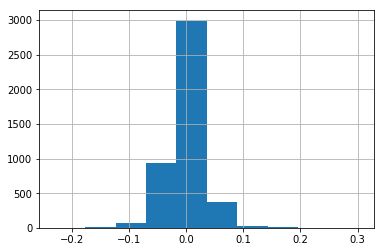

In [43]:
petro['pct_change'].hist();

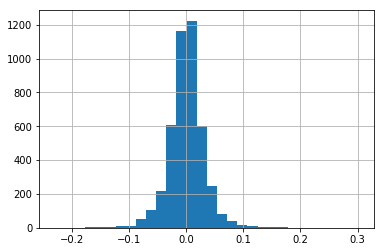

In [44]:
#Precisão de 30 barras
petro['pct_change'].hist(bins=30);

**taxa diária acumulada**

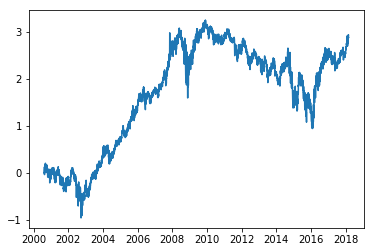

In [45]:
plt.plot(petro['pct_change'] + petro['pct_change'].cumsum());

**Janelas deslizantes**

Outro conceito interessante para analises em series temporais são as janelas deslizantes, elas agrupam periodos da serie, permitindo aplicar operações sobre esses periodos como a media, o que muitos chamam de media movel.
Este calculo é utilizado para encontrar tendencias em uma serie temporal. 

O pandas oference um metodo que permite esse calcula se passando o periodo.

In [46]:
petro['Close'].rolling(window=40)

Rolling [window=40,center=False,axis=0]

In [47]:
petro['Close'].rolling(window=10).mean()[:20]

Date
2000-08-10         NaN
2000-08-11         NaN
2000-08-14         NaN
2000-08-15         NaN
2000-08-16         NaN
2000-08-17         NaN
2000-08-18         NaN
2000-08-21         NaN
2000-08-22         NaN
2000-08-23    7.298437
2000-08-24    7.320312
2000-08-25    7.362500
2000-08-28    7.404687
2000-08-29    7.468750
2000-08-30    7.542188
2000-08-31    7.568750
2000-09-01    7.623438
2000-09-05    7.679688
2000-09-06    7.768750
2000-09-07    7.850000
Name: Close, dtype: float64

In [48]:
petro['Close'].rolling(window=10).sum()[:20]

Date
2000-08-10         NaN
2000-08-11         NaN
2000-08-14         NaN
2000-08-15         NaN
2000-08-16         NaN
2000-08-17         NaN
2000-08-18         NaN
2000-08-21         NaN
2000-08-22         NaN
2000-08-23    72.98437
2000-08-24    73.20312
2000-08-25    73.62500
2000-08-28    74.04687
2000-08-29    74.68750
2000-08-30    75.42188
2000-08-31    75.68750
2000-09-01    76.23438
2000-09-05    76.79688
2000-09-06    77.68750
2000-09-07    78.50000
Name: Close, dtype: float64

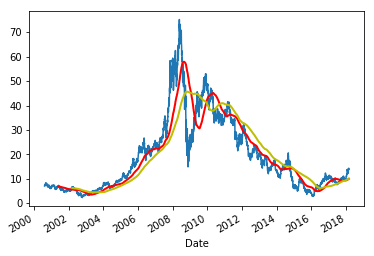

In [49]:
petro['Close'].plot();
petro['Close'].rolling(window=200).mean().plot(color='r',lw=2);
petro['Close'].rolling(window=400).mean().plot(color='y',lw=2);

**Volatinidade**

Volatinidade também é um conceito muito utilizando em calculos de ações, ela utilizada para verificar o risco de uma ação, seu calculo é feito com a multiplicação do desvio padrão vezes a raiz de um periodo. Abaixo segue um link com melhores explicações sobre volatinidade.

https://www.infomoney.com.br/educacao/guias/noticia/480519/risco-volatilidade-conceitos-fundamentais-hora-investir

In [50]:
periodo = 20
volat = petro['Close'].rolling(window=periodo).std() * np.sqrt(periodo)

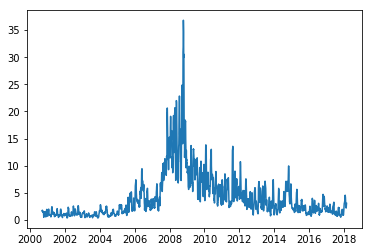

In [51]:
plt.plot(volat);

**Comparapando volatinidade**

Comparar a volatinidade de duas ações pode ser uma medida para verificar o risco de uma em relação ao risco de outra. 

In [52]:
itau = pdr.get_data_yahoo('ITUB', 
                          start=datetime.datetime(2000, 2, 29), 
                          end=datetime.datetime(2018, 2, 28))

In [53]:
itau.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-02-25,2.536439,2.440270,2.441473,2.536439,1189400.0,0.876291
2002-02-26,2.626596,2.503381,2.521412,2.617581,13809000.0,0.904709
2002-02-27,2.626596,2.576108,2.621187,2.614576,4663300.0,0.903670
2002-02-28,2.590533,2.579715,2.590533,2.581518,6558400.0,0.892245
2002-03-01,2.575507,2.491360,2.575507,2.524418,1731800.0,0.872509


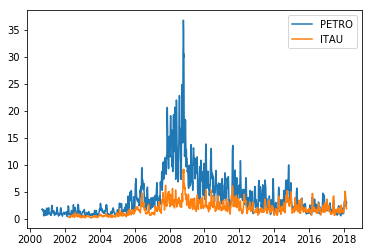

In [54]:
volat = itau['Close'].rolling(window=periodo).std() * np.sqrt(periodo);
volatpetro = petro['Close'].rolling(window=periodo).std() * np.sqrt(periodo);
plt.plot(volatpetro,label='PETRO');
plt.plot(volat,label='ITAU');
plt.legend();

**Estrategia de Trading**

Por fim vamos fazer uma extrategia simples de trading de ações, verificando sua media movel em dois periodos diferentes.

Quando temos ambas as medias moveis se cruzamos temos e indicio que temos que fazer alguma operação na ação, caso o periodo menor cruze o maior baixo é sinal que a ação deve subir, ou seja vamos comprar mais ações, caso o periodo menor cruze por cima e sinal que a ação ira cair, ou seja vedemos a ação.

In [55]:
import statsmodels.api as sm
from pandas.core import datetools

C:\Users\vinic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


In [56]:
#Criando Adj Close
petro['Adj Close'] = petro['Close'] -petro['Open']
petro.head()

,High,Low,Open,Close,Volume,Adj Close,diff,pct_change
Date,,,,,,,,
2000-08-10,7.15625,6.12500,6.31250,7.15625,143929200.0,0.84375,-0.84375,NaN
2000-08-11,7.28125,6.75000,6.84375,7.14062,25139200.0,0.29687,-0.29687,-0.002184
2000-08-14,7.21875,7.00000,7.03125,7.10938,6935200.0,0.07813,-0.07813,-0.004375
2000-08-15,7.35938,7.01562,7.10938,7.14062,9078800.0,0.03124,-0.03124,0.004394
2000-08-16,7.50000,7.12500,7.20312,7.32812,11728000.0,0.12500,-0.12500,0.026258


In [57]:
short_window = 100
long_window = 500

# Criando Datafame para os sinais sinais
sinais = pd.DataFrame(index=petro.index)
sinais['signal'] = 0.0

# Criando uma janela de medias a partir de tamanho short_window
sinais['media_short'] = petro['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Criando uma janela de medias a partir de tamanho long_window
sinais['media_long'] = petro['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# criando os signals, onde a media pequena for maior que a media longa
sinais['signal'][short_window:] = np.where(sinais['media_short'][short_window:] > sinais['media_long'][short_window:], 1.0, 0.0)   

# As posições são os valores dos sinais
sinais['positions'] = sinais['signal'].diff()

sinais.head()

,signal,media_short,media_long,positions
Date,,,,
2000-08-10,0.0,7.156250,7.156250,NaN
2000-08-11,0.0,7.148435,7.148435,0.0
2000-08-14,0.0,7.135417,7.135417,0.0
2000-08-15,0.0,7.136718,7.136718,0.0
2000-08-16,0.0,7.174998,7.174998,0.0


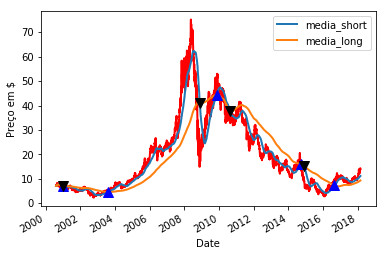

In [58]:
fig = plt.figure()

# Criando primeiro plot e adicionando nome ao eixo y
ax1 = fig.add_subplot(111,  ylabel='Preço em $')

# plot do valor 'close', cor vermelha
petro['Close'].plot(ax=ax1,color='r', lw=2);

# Plot the short and long moving averages
sinais[['media_short', 'media_long']].plot(ax=ax1,lw=2);

# # Plot sinais de compra, quando ira subir
plt.plot(sinais.loc[sinais.positions == 1.0].index, sinais[sinais.positions == 1.0]['media_short'], '^', markersize=10, color='blue');
         
# # Plot sinais de venda, quando ira descer
plt.plot(sinais.loc[sinais.positions == -1.0].index, sinais[sinais.positions == -1.0]['media_short'],'v', markersize=10, color='black');